## INTRODUCTION: RETAIL ANALYTICS: Task 1
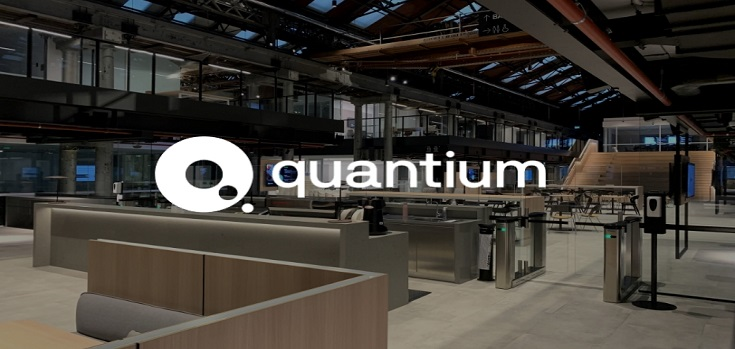
## Case Scenerio:
You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.
The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

### TASK INCLUDE:
We need to present a strategic recommendation to Julia the client that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.<br>

Below are the outlined main tasks along with what we should be looking for in the data for each.<br> 

Examine transaction data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis.<br>

Examine customer data – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.<br>

Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia.<br>

You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. 

Make sure you save your analysis in the CSV files and your visualisations – we will need them for our report. If you could work on this analysis and send me your initial findings by end of next week that would be great.<br>

In [113]:
import warnings
warnings.filterwarnings('ignore')


#Importing required libraries
import pandas as pd
import numpy as np
import datetime
import re

import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors
%matplotlib inline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

# t-test library package
from scipy.stats import ttest_ind

#check for association words package
from mlxtend.frequent_patterns import apriori, association_rules

Github Doesn't allow plotly to be interactive hence the need to make it static by changing the default renderers to svg.I will be using a different method to make the visuals interactive just as plotly is through an html link.it will also be in the same github repository.

In [114]:
import plotly.io as pio
pio.renderers.default='svg'

In [115]:
#Loading the csv fileS into a dataframe
purchase_behaviour = pd.read_csv('./datasets/QVI_purchase_behaviour.csv')

#Loading the excel workbook file into a dataframe
transaction_data = pd.read_excel('./datasets/QVI_transaction_data.xlsx')

### Getting the sum of rows and columns from each dataframe

In [116]:
purchase_behaviour.shape

(72637, 3)

In [117]:
transaction_data.shape

(264836, 8)

### Merging the two dataframes together using a common column in both dataframes

In [118]:
df1 = purchase_behaviour.merge(transaction_data, how='left',on='LYLTY_CARD_NBR')

In [119]:
#Getting the sum of rows and columns in the dataframe
df1.shape

(264836, 10)

In [120]:
df1.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'DATE', 'STORE_NBR',
       'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [121]:
#Renaming the columns
df1.rename(columns = {'LYLTY_CARD_NBR':'Loyalty_Card_Number','LIFESTAGE':'Life_Stage',
                         'PREMIUM_CUSTOMER':'Customer_Category','DATE':'Date','STORE_NBR':'Store_Number',
                         'TXN_ID':'Transaction_ID','PROD_NBR':'Product_Number','PROD_NAME':'Product_Name','PROD_QTY':'Product_Quantity',
                         'TOT_SALES':'Total_Sales'},inplace=True)

In [122]:
#Getting an overview of the merged dataframe
df1.sample(2)

,Loyalty_Card_Number,Life_Stage,Customer_Category,Date,Store_Number,Transaction_ID,Product_Number,Product_Name,Product_Quantity,Total_Sales
135001,134072,OLDER SINGLES/COUPLES,Mainstream,43431,134,137781,50,Tostitos Lightly Salted 175g,2,8.80
199990,205048,YOUNG SINGLES/COUPLES,Mainstream,43298,205,204108,7,Smiths Crinkle Original 330g,2,11.40


### Task Note:
1. Saving the merged dataframe.<br>
2. Creating a list containing possible missing value notations in the dataframe.<br>
3. Reading in the saved dataframe and also adding in the list of missing values notations for fully capturing missing values in the dataframe if there are any.

In [123]:
#Saving the merged dataset as csv
df1.to_csv('merged.csv', index = False)

In [124]:
#Creating a list with possible missing value notations in the dataframe
missing_value = ['N/a','na','NA',np.nan,None,'missing']

#Changing the default setting of  "na_value = None" function and replacing the None with the missing_value list that was created. 
df3 = pd.read_csv('merged.csv', na_values=missing_value)

### DATA CLEANING AND EXPLORATORY ANALYSIS 

### Detecting Duplicates And Handling it

In [125]:
#Getting the total number of duplicates in the dataframe
df3.duplicated().sum()

1

In [126]:
#Viewing the rows with duplicates,either the first or last row
df3[df3.duplicated(keep='first')]

,Loyalty_Card_Number,Life_Stage,Customer_Category,Date,Store_Number,Transaction_ID,Product_Number,Product_Name,Product_Quantity,Total_Sales
106249,107024,OLDER SINGLES/COUPLES,Premium,43374,107,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.00


In [127]:
#Removing the duplicates
df3 = df3.drop_duplicates().reset_index(drop=True)

### Detecting Null Values And Handling it

In [128]:
#Getting the columns and a sum of their null values
df3.isna().sum()

Loyalty_Card_Number    0
Life_Stage             0
Customer_Category      0
Date                   0
Store_Number           0
Transaction_ID         0
Product_Number         0
Product_Name           0
Product_Quantity       0
Total_Sales            0
dtype: int64

In [129]:
#Getting all rows with complete null values.
df3[df3.isna().all(axis=1)]

,Loyalty_Card_Number,Life_Stage,Customer_Category,Date,Store_Number,Transaction_ID,Product_Number,Product_Name,Product_Quantity,Total_Sales


All duplicates and missing values cases have been successfully handled

### Accessing Data Quality on Individual columns and it values

In [130]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264835 entries, 0 to 264834
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Loyalty_Card_Number  264835 non-null  int64  
 1   Life_Stage           264835 non-null  object 
 2   Customer_Category    264835 non-null  object 
 3   Date                 264835 non-null  int64  
 4   Store_Number         264835 non-null  int64  
 5   Transaction_ID       264835 non-null  int64  
 6   Product_Number       264835 non-null  int64  
 7   Product_Name         264835 non-null  object 
 8   Product_Quantity     264835 non-null  int64  
 9   Total_Sales          264835 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


### Date Column

In [131]:
#A Function to convert excel date type of integer into yyyy-mm-dd format
def xlseriesdate_to_datetime(xlserialdate):
    excel_anchor = datetime.datetime(1900, 1, 1)
    if(xlserialdate < 60):
        delta_in_days = datetime.timedelta(days = (xlserialdate - 1))
    else:
        delta_in_days = datetime.timedelta(days = (xlserialdate - 2))
    converted_date = excel_anchor + delta_in_days
    return converted_date

#Applying function to Date column in the dataframe
df3['Date'] = df3['Date'].apply(xlseriesdate_to_datetime)

### Augmenting Dataframe with Additional columns

### Pack Size Column

In [132]:
#Getting the pack size from the product name column
df3["Pack_Size (grams)"] = df3["Product_Name"].str.extract("(\d+)")

In [133]:
#Checking the datatype of the pack_size column
df3["Pack_Size (grams)"].dtype

dtype('O')

In [134]:
#Converting pack size datatype from object to numeric
df3["Pack_Size (grams)"] = pd.to_numeric(df3["Pack_Size (grams)"])

### Brand Name Column
To get the Brands name column from the Product name column, the Product name column has to be cleaned first

In [135]:
#Getting the unique values from the product name column
df3['Product_Name'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'Red Rock Deli Chikn&Garlic Aioli 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Natural ChipCo      Hony Soy Chckn175g',
       'WW Original Stacked Chips 160g', 'Cheetos Puffs 165g',
       'Infuzions SourCream&Herbs Veg Strws 110g',
       'RRD SR Slow Rst     Pork Belly 150g',
       'Doritos Cheese      Supreme 330g', 'Doritos Mexicana    170g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Smiths Crinkle Cut  Chips Barbecue 170g',
       'Kettle Sensations   Camembert & Fig 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'CCs Tasty Cheese    175g', 'Tostitos Splash Of  Lime 175g',
       'Kettle 135g Swt Pot Sea Salt', 'RRD Salt & Vinegar  165g',
       'Infuzions Mango     Chutny Papadums 70g',
       'Smiths Crinkle Cut  Snag&Sauce 150g',
       'Smiths Crinkle      Original 330g',
       'RRD Sweet Chilli &  Sour Cream 165g',
     

In [136]:
#Getting the total unique product names found in the column
len(df3["Product_Name"].unique())

114

In [137]:
#Cleaning the product name column by removing special characters such as '&' and '/' and also the product size.
def column_cleanup(text):
    text = re.sub('[&/]', ' ', text)
    text = re.sub('\d\w*', ' ', text)
    return text

#Applying the column_cleanup function to product_name column
df3['Product_Name'] = df3['Product_Name'].apply(column_cleanup)

In [138]:
df3['Product_Name']

0           Natural Chip        Compny SeaSalt 
1            Red Rock Deli Chikn Garlic Aioli  
2            Grain Waves Sour    Cream Chives  
3           Natural ChipCo      Hony Soy Chckn 
4                   WW Original Stacked Chips  
                          ...                  
264830       Grain Waves         Sweet Chilli  
264831        Kettle Tortilla ChpsFeta Garlic  
264832     Tyrrells Crisps     Lightly Salted  
264833    Old El Paso Salsa   Dip Chnky Tom Ht 
264834    Smiths Crinkle Chips Salt   Vinegar  
Name: Product_Name, Length: 264835, dtype: object

In [139]:
#Getting the  most common words by counting the number of times it appears.Top fifteen words and their count
product_name = df3["Product_Name"]
words_count = pd.Series(' '.join(product_name).split()).value_counts()
words_count[:15]

Chips       49770
Kettle      41288
Smiths      28859
Salt        27976
Cheese      27890
Pringles    25102
Doritos     24962
Crinkle     23960
Corn        22063
Original    21560
Cut         20753
Chip        18645
Chicken     18576
Salsa       18094
Cream       16926
dtype: int64

In [140]:
#Removing the Salsa word from the product_name column in the dataframe
df3 = df3[df3['Product_Name'].str.contains(r"[Ss]alsa") == False]

In [141]:
#Getting the sum of rows from the dataframe
df3.shape[0]

246741

In [142]:
#Creating the brand_names based on the first word found in the product_name column
df3["Brand_Names"] = df3["Product_Name"].str.split().str.get(0)

In [143]:
#Getting the unique values from the brand_name column
df3['Brand_Names'].unique()

array(['Natural', 'Red', 'Grain', 'WW', 'Cheetos', 'Infuzions', 'RRD',
       'Doritos', 'GrnWves', 'Smiths', 'Kettle', 'CCs', 'Tostitos',
       'Cobs', 'Burger', 'Woolworths', 'Thins', 'Tyrrells', 'Smith',
       'Cheezels', 'Twisties', 'Sunbites', 'Snbts', 'Pringles', 'French',
       'Infzns', 'Dorito', 'NCC'], dtype=object)

In [144]:
#Creating a function to identify the string replacements needed to avoid double brand_names.
def brandname_replacement(line):
    name = line['Brand_Names']
    if name == "Infzns":
        return "Infuzions"
    elif name == "Red":
        return "Red Rock Deli"
    elif name == "RRD":
        return "Red Rock Deli"
    elif name == "Grain":
        return "Grain Waves"
    elif name == "GrnWves":
        return "Grain Waves"
    elif name == "Snbts":
        return "Sunbites"
    elif name == "Natural":
        return "Natural Chip Co"
    elif name == "NCC":
        return "Natural Chip Co"
    elif name == "WW":
        return "Woolworths"
    elif name == "Smith":
        return "Smiths"
    elif name == "Dorito":
        return "Doritos"
    else:
        return name 
    
#Applying the function
df3["Brand_Names"] = df3.apply(lambda line: brandname_replacement(line), axis=1)

In [145]:
#Checking to see that there are no duplicate brands_name 
df3["Brand_Names"].unique()

array(['Natural Chip Co', 'Red Rock Deli', 'Grain Waves', 'Woolworths',
       'Cheetos', 'Infuzions', 'Doritos', 'Smiths', 'Kettle', 'CCs',
       'Tostitos', 'Cobs', 'Burger', 'Thins', 'Tyrrells', 'Cheezels',
       'Twisties', 'Sunbites', 'Pringles', 'French'], dtype=object)

### Customer Category Column
Getting the customers categories and their sum from the purchase_behaviour column

In [146]:
purchase_behaviour['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

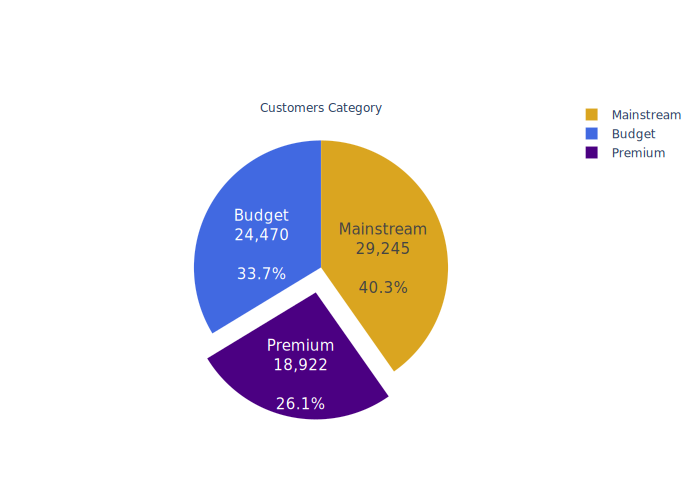

In [147]:
#Plotting the customer category in a pi chart
title = 'Customers Category'
colors = ['goldenrod','royalblue','indigo']
labels = ['Mainstream','Budget','Premium']
values = [29245, 24470,18922]
fig = go.Figure(data=[go.Pie(title=title, labels=labels, values=values, pull=[0, 0, 0.2, 0])])

fig.update_traces(hoverinfo='label+percent+value',textfont_size=15,textinfo='label+value+percent',marker=dict
                  (colors=colors,line=dict(color='#FFFFFF',width=0.1)))

fig.show()

### Product Quantity Column

In [148]:
#Getting the unique values from the product_quantity column
df3["Product_Quantity"].unique()

array([  2,   1,   4,   3,   5, 200], dtype=int64)

In [149]:
#Getting the sum of occurrences of the unique values found in the product_quantity column
product_quantity_count = df3.Product_Quantity.value_counts()
product_quantity_count

2      220069
1       25476
5         415
3         408
4         371
200         2
Name: Product_Quantity, dtype: int64

There seems to be an anomaly likely an outlier regarding the two(2) occurences of product_quantity of 200 compared to other quantities found in the column. Evaluating further to see if it is an outlier or not.

In [150]:
#Getting the two rows with the transactions
df3[df3["Product_Quantity"] == 200]

,Loyalty_Card_Number,Life_Stage,Customer_Category,Date,Store_Number,Transaction_ID,Product_Number,Product_Name,Product_Quantity,Total_Sales,Pack_Size (grams),Brand_Names
221624,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme,200,650.00,380,Doritos
221625,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme,200,650.00,380,Doritos


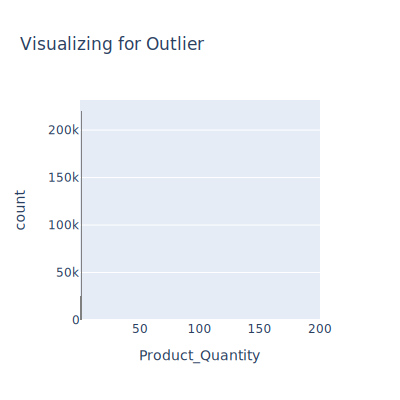

In [151]:
#Visually Detecting the outlier
fig = px.histogram(df3,x='Product_Quantity',title='Visualizing for Outlier',width=400,height=400)
fig.update_traces(marker_color='grey')
fig.show()

In [152]:
#Removing the outlier as it is only two rows
df3.drop(df3.index[df3['Loyalty_Card_Number'] == 226000],inplace=True)

The transaction of Product_Quantity of 200 was found to have been made by 1 person with the loyalty card number of [226000] resulting to a possible outlier.The transaction for both of these rows were dropped.

In [153]:
#Rechecking
df3.Product_Quantity.value_counts()

2    220069
1     25476
5       415
3       408
4       371
Name: Product_Quantity, dtype: int64

Looking at the number of transaction lines over time to see if there are any obvious data issues such as missing data by counting the number of transactions by Date.

In [154]:
#Checking for date issue whether there is missing value
df3["Date"].nunique()

364

There's only 364 rows, meaning only 364 dates which indicates a missing date.

In [155]:
#Getting the range of date from the dataframe
df3.sort_values("Date")

,Loyalty_Card_Number,Life_Stage,Customer_Category,Date,Store_Number,Transaction_ID,Product_Number,Product_Name,Product_Quantity,Total_Sales,Pack_Size (grams),Brand_Names
41656,47142,MIDAGE SINGLES/COUPLES,Budget,2018-07-01,47,42540,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.80,380,Smiths
72531,75163,RETIREES,Budget,2018-07-01,75,74054,20,Doritos Cheese Supreme,2,11.40,330,Doritos
17322,21115,MIDAGE SINGLES/COUPLES,Premium,2018-07-01,21,17700,81,Pringles Original Crisps,2,7.40,134,Pringles
169518,172045,RETIREES,Budget,2018-07-01,172,173027,85,RRD Honey Soy Chicken,2,6.00,165,Red Rock Deli
85819,88283,RETIREES,Premium,2018-07-01,88,87636,112,Tyrrells Crisps Ched Chives,2,8.40,165,Tyrrells
...,...,...,...,...,...,...,...,...,...,...,...,...
106742,107109,OLDER SINGLES/COUPLES,Budget,2019-06-30,107,108968,113,Twisties Chicken,2,9.20,270,Twisties
50843,57110,OLDER SINGLES/COUPLES,Budget,2019-06-30,57,51897,43,Smith Crinkle Cut Bolognese,2,5.20,150,Smiths
236101,237192,YOUNG SINGLES/COUPLES,Mainstream,2019-06-30,237,240972,62,Pringles Mystery Flavour,2,7.40,134,Pringles
92380,95048,YOUNG SINGLES/COUPLES,Mainstream,2019-06-30,95,94338,3,Kettle Sensations Camembert Fig,2,9.20,150,Kettle


The date range is from 2018-07-01 to 2019-06-30.Hence Creating a column of dates that includes every day from 1 Jul 2018 to 30 Jun 2019, and joining it onto the data to fill in the missing day.

In [156]:
#Generating a list of dates with transactions in ascending order 
count_of_dates = df3.groupby('Date').size()

#Comparing it to a full list of dates within the same range to find differences between them 
pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(count_of_dates.index)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

The missing day is 2018-12-25 which is public holiday/Christmas,hence there was no sales that day

### Pack Size Column
Ploting an histogram to show the number of transactions by pack size since it is a categorical 
variable and not a continuous variable even though it is numeric.

In [157]:
df3.sort_values("Pack_Size (grams)",ascending=False)

,Loyalty_Card_Number,Life_Stage,Customer_Category,Date,Store_Number,Transaction_ID,Product_Number,Product_Name,Product_Quantity,Total_Sales,Pack_Size (grams),Brand_Names
152765,155153,OLDER FAMILIES,Budget,2019-02-23,155,156002,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.80,380,Smiths
16281,19258,RETIREES,Premium,2019-03-14,19,16635,4,Dorito Corn Chp Supreme,2,13.00,380,Doritos
169753,172089,OLDER FAMILIES,Budget,2018-09-02,172,173272,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.80,380,Smiths
169720,172083,OLDER SINGLES/COUPLES,Mainstream,2018-10-15,172,173238,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.80,380,Smiths
16247,19245,YOUNG SINGLES/COUPLES,Premium,2018-10-15,19,16600,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.80,380,Smiths
...,...,...,...,...,...,...,...,...,...,...,...,...
16901,20288,RETIREES,Mainstream,2018-09-20,20,17265,38,Infuzions Mango Chutny Papadums,2,4.80,70,Infuzions
142054,144202,OLDER SINGLES/COUPLES,Mainstream,2018-11-07,144,145001,38,Infuzions Mango Chutny Papadums,2,4.80,70,Infuzions
142069,144204,YOUNG FAMILIES,Budget,2019-04-05,144,145017,38,Infuzions Mango Chutny Papadums,2,4.80,70,Infuzions
260039,269067,MIDAGE SINGLES/COUPLES,Premium,2018-10-28,269,265391,38,Infuzions Mango Chutny Papadums,2,4.80,70,Infuzions


In [158]:
pack_size_transactions = df3.groupby('Pack_Size (grams)')['Product_Quantity'].sum().reset_index()

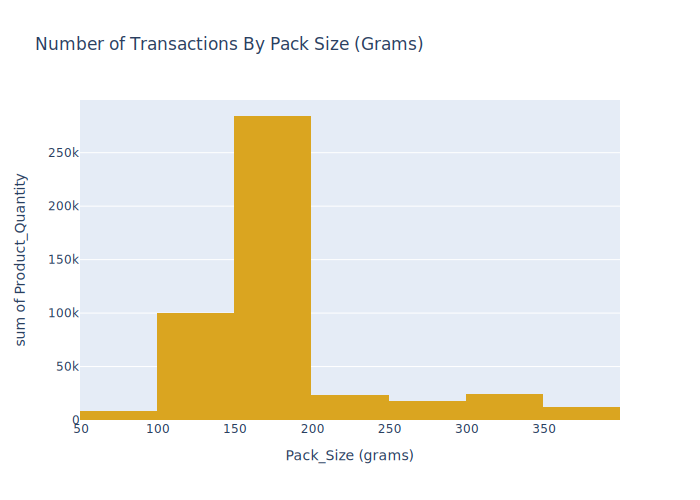

In [159]:
#Histogram showing the number of transactions by pack sizes
fig = px.histogram(pack_size_transactions,x='Pack_Size (grams)',y='Product_Quantity',
                   title='Number of Transactions By Pack Size (Grams)',width=700)

fig.update_traces(marker_color='goldenrod')
fig.show()

The lowest pack size is 70g while the highest is 380g.Pack size of 150g to 190g had the highest transactions while 50g to 90g had the lowest.

## Transactions Overtime Analysis

In [160]:
#Getting the count of sales made each day
sales_count = pd.pivot_table(df3, values = 'Total_Sales', index = 'Date', aggfunc = 'count')

In [161]:
#Getting the sum of total sales on each day with the aid of pivot table 
total_sales_overtime = pd.pivot_table(df3, values = 'Total_Sales', index = 'Date', aggfunc = 'sum')

In [162]:
#Getting the total duration of days
all_dates = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
all_dates['Total_Sales'] = 0
len(all_dates)

365

In [163]:
#Getting the sum of all sales and it's equivalent dates and filling any missing sales value with zero
dates_completed = total_sales_overtime + all_dates
dates_completed.fillna(0,inplace=True)

In [164]:
dates_completed.sample(5)

,Total_Sales
2018-12-12,4553.70
2019-04-28,5021.70
2019-01-02,4977.60
2018-07-11,5042.40
2019-03-17,5319.30


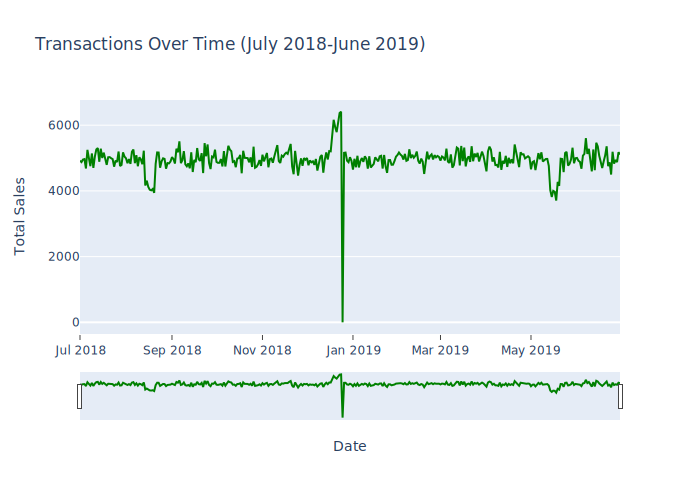

In [165]:
fig = px.line(x=dates_completed.index,y=dates_completed['Total_Sales'],title='Transactions Over Time (July 2018-June 2019)')

fig.update_traces(line_color='green')
fig.update_xaxes(title='Date',showgrid=False,ticks='outside',rangeslider_visible=True)
fig.update_yaxes(title='Total Sales')

fig.show()

In [166]:
#Getting the dates with zero sales
dates_completed[dates_completed["Total_Sales"]==0]

,Total_Sales
2018-12-25,0.00


In [167]:
#Filtering to get sales of december 2018 only
december_sales = dates_completed[(dates_completed.index < "2019-01-01") & (dates_completed.index > "2018-11-30")]

In [168]:
#Adding 1 to start the date from 1st
december_sales.reset_index(drop=True,inplace=True)
december_sales["Date"] = december_sales.index + 1

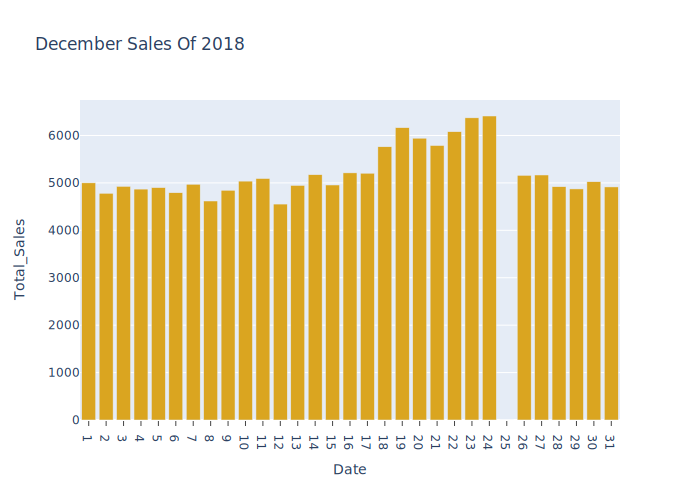

In [169]:
#December Sales of 2018
fig = px.bar(december_sales,x='Date', y='Total_Sales',title='December Sales Of 2018')

fig.update_traces(marker_color='goldenrod')
fig.update_xaxes(title='Date',ticks='outside',ticklen=5,dtick='M1')
fig.show()

### Life Stage Column

In [170]:
#Getting the sum of customers in each life stage segments
life_stage = df3.groupby('Life_Stage')['Loyalty_Card_Number'].count().reset_index(name='Customers')

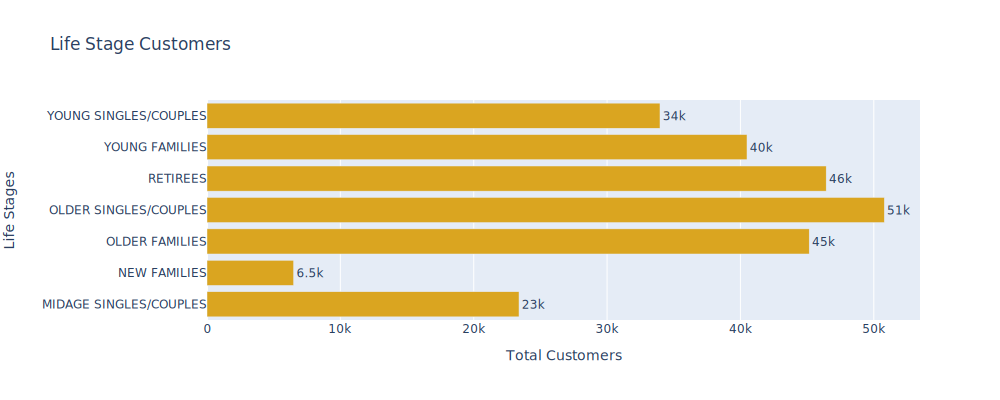

In [171]:
fig = px.bar(life_stage,x='Customers',y='Life_Stage',text='Customers',title='Life Stage Customers',
             orientation='h',width=1000,height=400)

fig.update_traces(texttemplate='%{text:.2s}',textposition='outside',marker_color='goldenrod')
fig.update_yaxes(title='Life Stages')
fig.update_xaxes(title='Total Customers')
fig.update_layout(uniformtext_minsize=15)

Majority of customers are from older singles/couples while the New Families has the least customers.

## Customer Segment Analysis

After carrying out cleaning and exploratory data analysis on the dataset. It is time to define some metrics of interest to the client in other to make a good recommendation for business strategy about the chips market.

### Metric 1:  Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is ?

In [172]:
#Calculating the total sales base on lifestage and customer category.  
total_chip_expenditure_by_customers = df3.groupby(['Life_Stage','Customer_Category'])['Total_Sales'].agg(['sum'])
total_chip_expenditure_by_customers.rename(columns={"sum":"Total_Sum_Sales"},inplace=True)
total_chip_expenditure_by_customers.sort_values("Total_Sum_Sales",ascending=False)

Total_Sum_Sales
Life_Stage             Customer_Category                 
OLDER FAMILIES         Budget                   156863.75
YOUNG SINGLES/COUPLES  Mainstream               147582.20
RETIREES               Mainstream               145168.95
YOUNG FAMILIES         Budget                   129717.95
OLDER SINGLES/COUPLES  Budget                   127833.60
                       Mainstream               124648.50
                       Premium                  123531.55
RETIREES               Budget                   105916.30
OLDER FAMILIES         Mainstream                96413.55
RETIREES               Premium                   91296.65
YOUNG FAMILIES         Mainstream                86338.25
MIDAGE SINGLES/COUPLES Mainstream                84734.25
YOUNG FAMILIES         Premium                   78571.70
OLDER FAMILIES         Premium                   75242.60
YOUNG SINGLES/COUPLES  Budget                    57122.10
MIDAGE SINGLES/COUPLES Premium                   54443.85
YOUNG SINGLES/COUPLES  Premium                   39052.30
MIDAGE SINGLES/COUPLES Budget                    33345.70
NEW FAMILIES           Budget                    20607.45
                       Mainstream                15979.70
                       Premium                   10760.80

In [173]:
#Creating a temporal dataframe for getting the sum of total sales and percentages base on life stage and the customer category columns
temp_df = df3.groupby(['Life_Stage','Customer_Category'])['Total_Sales'].sum().reset_index()
temp_df['Percentages'] = (temp_df['Total_Sales'] / temp_df['Total_Sales'].sum()) * 100
temp_df.sample

<bound method NDFrame.sample of                 Life_Stage Customer_Category  Total_Sales  Percentages
0   MIDAGE SINGLES/COUPLES            Budget     33345.70         1.85
1   MIDAGE SINGLES/COUPLES        Mainstream     84734.25         4.69
2   MIDAGE SINGLES/COUPLES           Premium     54443.85         3.02
3             NEW FAMILIES            Budget     20607.45         1.14
4             NEW FAMILIES        Mainstream     15979.70         0.89
5             NEW FAMILIES           Premium     10760.80         0.60
6           OLDER FAMILIES            Budget    156863.75         8.69
7           OLDER FAMILIES        Mainstream     96413.55         5.34
8           OLDER FAMILIES           Premium     75242.60         4.17
9    OLDER SINGLES/COUPLES            Budget    127833.60         7.08
10   OLDER SINGLES/COUPLES        Mainstream    124648.50         6.91
11   OLDER SINGLES/COUPLES           Premium    123531.55         6.84
12                RETIREES            Budget 

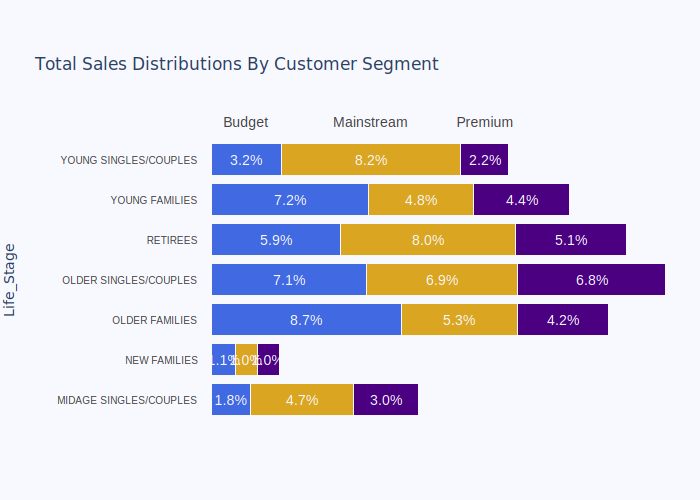

In [174]:
top_labels = ['Budget', 'Mainstream', 'Premium']

colors = ['royalblue', 'goldenrod','indigo']

x_data = [[1.8,4.7,3.0], [1.1,1.0,1.0], [8.7,5.3,4.2], [7.1,6.9,6.8], [5.9,8.0,5.1], [7.2,4.8,4.4], [3.2,8.2,2.2]]

y_data = ['MIDAGE SINGLES/COUPLES','NEW FAMILIES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES ','YOUNG FAMILIES',
          'YOUNG SINGLES/COUPLES']

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1],
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
# labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=10,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
# labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
# labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
# labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
#Labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations,title='Total Sales Distributions By Customer Segment')
fig.update_layout(yaxis=dict(title='Life_Stage'))

fig.show()

### INSIGHT :
The top five(5) sets of customers who spends on chips more are;<br>
1. The Older families on the Budget customer category segment accounting for 8.7% of chip purchases.<br>
2. Second is the Young Singles/Couples on the Mainstream customer category segment accounting for 8.2% of chip purchases.<br>
3. Third is the Retirees on the Mainstream customer category segment accounting for 8.0% of chip purchases.<br>
4. While fourth and fifth is the Young Families and Older Singles/Couples both on the Budget customer category segment accounting for 7.2% and 7.1% of chip purchases.<br>

The least chip purchasers are the New Families in the three customer segment category accounting only for 1.1% to 1.0%

### Metric 2: How many customers are found in each segment ?

In [175]:
#Getting the total number of customers in each segment by counting the unique loyalty card numbers
df3.groupby(['Life_Stage','Customer_Category'])['Loyalty_Card_Number'].agg('nunique').unstack('Customer_Category').fillna(0)

Customer_Category,Budget,Mainstream,Premium
Life_Stage,,,
MIDAGE SINGLES/COUPLES,1474,3298,2369
NEW FAMILIES,1087,830,575
OLDER FAMILIES,4611,2788,2231
OLDER SINGLES/COUPLES,4849,4858,4682
RETIREES,4385,6358,3812
YOUNG FAMILIES,3953,2685,2398
YOUNG SINGLES/COUPLES,3647,7917,2480


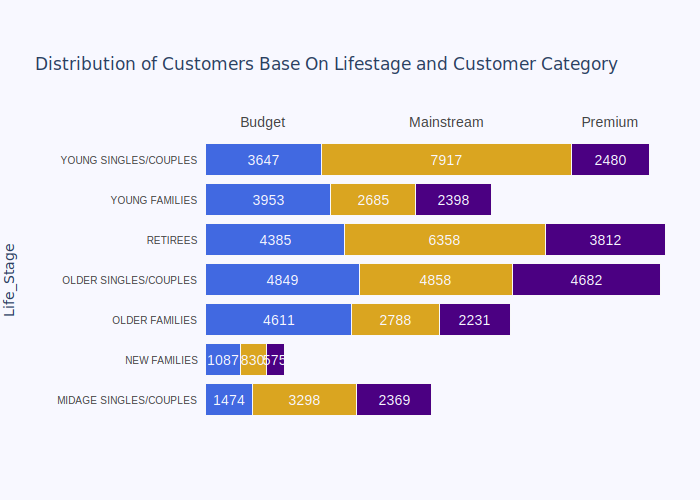

In [176]:
top_labels = ['Budget', 'Mainstream', 'Premium']

colors = ['royalblue', 'goldenrod','indigo']

x_data = [[1474,3298,2369], [1087,830,575], [4611,2788,2231], [4849,4858,4682], [4385,6358,3812], [3953,2685,2398], 
          [3647,7917,2480]]

y_data = ['MIDAGE SINGLES/COUPLES','NEW FAMILIES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES ','YOUNG FAMILIES',
          'YOUNG SINGLES/COUPLES']

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
# labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=10,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
# labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]),
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
# labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
# labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]),
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
#Labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations,
                  title='Distribution of Customers Base On Lifestage and Customer Category')
fig.update_layout(yaxis=dict(title='Life_Stage'))

fig.show()

### INSIGHT :
Majority of customers are from the Young singles/couples and Retirees mostly located at the Mainstream customer category segment followed slightly by customers from different life stages all located at the Budget customer category segment.From Comparison the purchasing power of these segments with high customers to Older Families with slight customers is low.Chip purchases from Older Families are higher.

### Metric 3: How many chips are bought per customer by segment ?

In [177]:
df3.columns

Index(['Loyalty_Card_Number', 'Life_Stage', 'Customer_Category', 'Date',
       'Store_Number', 'Transaction_ID', 'Product_Number', 'Product_Name',
       'Product_Quantity', 'Total_Sales', 'Pack_Size (grams)', 'Brand_Names'],
      dtype='object')

In [178]:
#Getting the average unit of chips bought per customer
avg_units = df3.groupby(['Customer_Category', 'Life_Stage']).Product_Quantity.sum() / df3.groupby(['Customer_Category', 'Life_Stage']).Loyalty_Card_Number.nunique()

#Creating a dataframe and sorting the dataframe
avg_units = pd.DataFrame(avg_units, columns = {'Average Unit per Customer'}).reset_index()
avg_units.sort_values(by ='Average Unit per Customer', ascending = False).head(5)

,Customer_Category,Life_Stage,Average Unit per Customer
9,Mainstream,OLDER FAMILIES,9.26
2,Budget,OLDER FAMILIES,9.08
16,Premium,OLDER FAMILIES,9.07
5,Budget,YOUNG FAMILIES,8.72
19,Premium,YOUNG FAMILIES,8.72


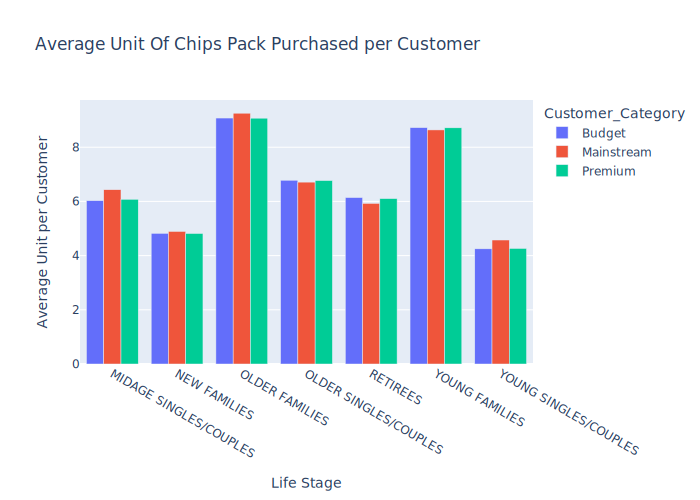

In [179]:
#Plotting the average no of chips pack bought per customer base life stage and customer_category.
fig = px.bar(avg_units,x='Life_Stage',y='Average Unit per Customer',barmode='group',color='Customer_Category',
             title='Average Unit Of Chips Pack Purchased per Customer')
fig.update_yaxes(title='Average Unit per Customer')
fig.update_xaxes(title='Life Stage')
fig.show()

### INSIGHT :
Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy 
chips, this is mainly for entertainment purposes rather than their own consumption.This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.<br>
Older families and young families in general buy more chips per customer

### Metric 4:  What's the average chip price by customer segment ?

In [180]:
df3[["Total_Sales","Product_Quantity"]].head()

,Total_Sales,Product_Quantity
0,6.00,2
1,2.70,1
2,3.60,1
3,3.00,1
4,1.90,1


In [181]:
#Creating a new column for price per unit of chips purchased per transaction 
df3['Price_Per_Unit'] = df3['Total_Sales'] / df3['Product_Quantity']

In [182]:
#Getting the average chip price base on life stage and customer_category.
avg_chip_price = df3.groupby(['Life_Stage','Customer_Category'])['Price_Per_Unit'].mean().reset_index()

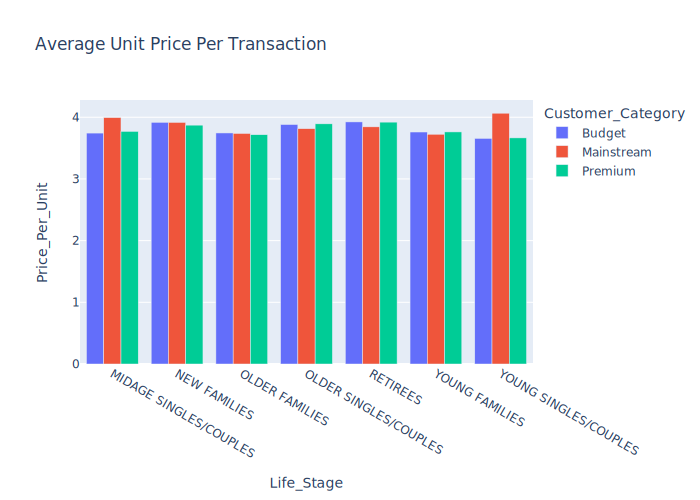

In [183]:
#Plotting the average no of chips pack bought per customer base life stage and customer_category.
px.bar(avg_chip_price,x='Life_Stage',y='Price_Per_Unit',barmode='group',color='Customer_Category',
       title='Average Unit Price Per Transaction')

### INSIGHT :
Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy 
chips, this is mainly for entertainment purposes rather than their own consumption.This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

### Metric 5: Performing an independent T-Test between mainstream, premium and budget of the customer category segment  between Midage singles/couples and Young singles/couples to see if the difference is significant.

In [184]:
df3[['Customer_Category','Life_Stage']].head()

,Customer_Category,Life_Stage
0,Premium,YOUNG SINGLES/COUPLES
1,Mainstream,YOUNG SINGLES/COUPLES
2,Budget,YOUNG FAMILIES
3,Budget,YOUNG FAMILIES
4,Mainstream,OLDER SINGLES/COUPLES


In [185]:
#Filtering the customer category to identify the mainstream segment required for testing.
mainstream_segment = df3["Customer_Category"] == "Mainstream"

#Filtering the customer category to identify only the budget and premium required for testing.
premium_and_budget_segment = df3["Customer_Category"] != "Mainstream"

#Filtering the life stage to identify the life stage category required for testing
midage_and_young = (df3["Life_Stage"] == "MIDAGE SINGLES/COUPLES") | (df3["Life_Stage"] == "YOUNG SINGLES/COUPLES")

#Grouping the parameters for testing
group1 = df3[mainstream_segment & midage_and_young]["Price_Per_Unit"]
group2 = df3[premium_and_budget_segment & midage_and_young]["Price_Per_Unit"]

#Running test
stat, pval = ttest_ind(group1.values, group2.values, equal_var=False)
print(pval, stat)

6.967354233018139e-306 37.6243885962295


### INSIGHT :
The t-test results in a p-value close to 0 implies the unit price for mainstream segment for young and mid-age singles/couples are significantly higher than that of budget or premium segment for young and midage singles/couples.

## Further Analysis
Further analysis carried out to target customer segments that contribute the most to sales to retain them or further increase sales.Task is to find out if they tend to buy a particular brand of chips mostly.<br>
### Target Customers:
1. Older families from the Budget customer category.<br>
2. Young singles/couples from the Mainstream customer category<br>
3. Retirees from the Mainstream customer category.

In [186]:
#Filtering to get only customers from the young singles/couples category
young_mainstream_segment = df3.loc[df3['Life_Stage'] == "YOUNG SINGLES/COUPLES"]

In [187]:
#Filtering to get only customers found in the mainstream segment
young_mainstream_segment = young_mainstream_segment.loc[young_mainstream_segment['Customer_Category'] == "Mainstream"]

In [188]:
#Getting the sum of product quantity purchased from various brands
brands = young_mainstream_segment.groupby('Brand_Names')['Product_Quantity'].sum().reset_index()

#Getting the various percentages of purchases
brands['Percent'] = brands['Product_Quantity'] / brands['Product_Quantity'].sum() * 100

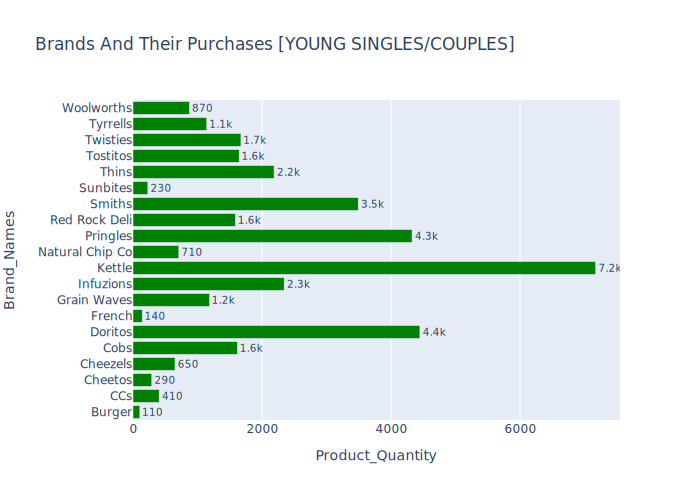

In [189]:
fig = px.bar(brands,y='Brand_Names',x='Product_Quantity',text='Product_Quantity',
             title='Brands And Their Purchases [YOUNG SINGLES/COUPLES]')
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside',marker_color='green')
fig.update_layout(uniformtext_minsize=13)

In [190]:
#Filtering to get only customers from the young singles/couples category
retirees_mainstream_segment = df3.loc[df3['Life_Stage'] == "RETIREES"]

##Filtering to get only customers found in the mainstream segment
retirees_mainstream_segment = retirees_mainstream_segment.loc[retirees_mainstream_segment['Customer_Category'] == "Mainstream"]

#Getting the sum of product quantity purchased from various brands
brands = retirees_mainstream_segment.groupby('Brand_Names')['Product_Quantity'].sum().reset_index()

#Getting the various percentages of purchases
brands['Percent'] = brands['Product_Quantity'] / brands['Product_Quantity'].sum() * 100

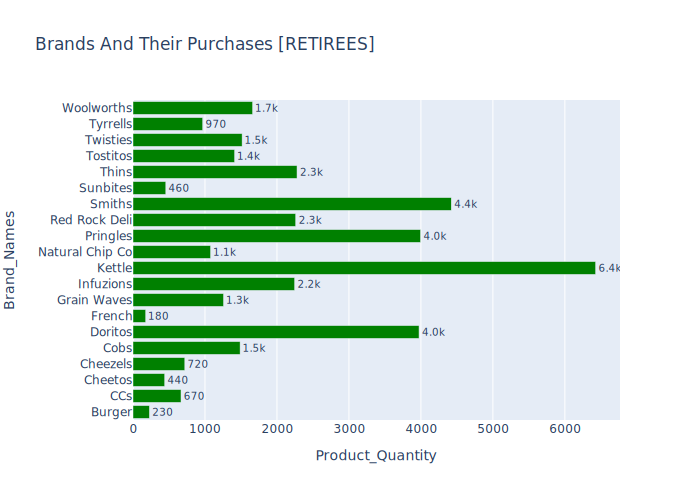

In [191]:
fig = px.bar(brands,y='Brand_Names',x='Product_Quantity',text='Product_Quantity',
             title='Brands And Their Purchases [RETIREES]')
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside',marker_color='green')
fig.update_layout(uniformtext_minsize=13)

The top 3 of most famous brands are kettle,smiths and doritos and the lowest brands are French,Burger and Sunbites base on the number of sales.

## AFFINITY ANALYSIS: Brands Targeted by the following customers Segments:
1. Older families - Budget.
2. Young singles/couples - Mainstream.
3. Retiree's - Mainstream.

In [192]:
#Creating a new dataframe from a copy of df3
df4 = df3.copy()

#Augmenting the dataframe with a new column by dividing the 
#mainstream and other customer
df4["Category_Grouping"] = df4["Life_Stage"] + ' - ' + df4['Customer_Category']
df4.head(5)

,Loyalty_Card_Number,Life_Stage,Customer_Category,Date,Store_Number,Transaction_ID,Product_Number,Product_Name,Product_Quantity,Total_Sales,Pack_Size (grams),Brand_Names,Price_Per_Unit,Category_Grouping
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt,2,6.00,175,Natural Chip Co,3.00,YOUNG SINGLES/COUPLES - Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn Garlic Aioli,1,2.70,150,Red Rock Deli,2.70,YOUNG SINGLES/COUPLES - Mainstream
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream Chives,1,3.60,210,Grain Waves,3.60,YOUNG FAMILIES - Budget
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn,1,3.00,175,Natural Chip Co,3.00,YOUNG FAMILIES - Budget
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips,1,1.90,160,Woolworths,1.90,OLDER SINGLES/COUPLES - Mainstream


In [193]:
#Introducing dummy values into the columns to generate the frequency of occurence of the values in the rows
category_group = pd.get_dummies(df4["Category_Grouping"])
brand_names = pd.get_dummies(df4["Brand_Names"])
df5 = category_group.join(brand_names)
df5.head(5)

,MIDAGE SINGLES/COUPLES - Budget,MIDAGE SINGLES/COUPLES - Mainstream,MIDAGE SINGLES/COUPLES - Premium,NEW FAMILIES - Budget,NEW FAMILIES - Mainstream,NEW FAMILIES - Premium,OLDER FAMILIES - Budget,OLDER FAMILIES - Mainstream,OLDER FAMILIES - Premium,OLDER SINGLES/COUPLES - Budget,...,Natural Chip Co,Pringles,Red Rock Deli,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [194]:
#Introducing the association rule mining
df5_frequency = apriori(df5, min_support=0.007, use_colnames=True)
result = association_rules(df5_frequency, metric="lift", min_threshold=0.5)
result.sort_values('confidence', ascending = False, inplace = True)

In [195]:
result[['antecedents','consequents','antecedent support','consequent support','support','confidence',
        'lift','leverage','conviction']]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
60,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.08,0.17,0.02,0.20,1.18,0.00,1.04
0,(MIDAGE SINGLES/COUPLES - Mainstream),(Kettle),0.04,0.17,0.01,0.19,1.15,0.00,1.03
36,(RETIREES - Budget),(Kettle),0.06,0.17,0.01,0.18,1.09,0.00,1.02
46,(RETIREES - Premium),(Kettle),0.05,0.17,0.01,0.18,1.08,0.00,1.02
16,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.07,0.17,0.01,0.18,1.07,0.00,1.01
...,...,...,...,...,...,...,...,...,...
47,(Kettle),(RETIREES - Premium),0.17,0.05,0.01,0.05,1.08,0.00,1.00
1,(Kettle),(MIDAGE SINGLES/COUPLES - Mainstream),0.17,0.04,0.01,0.05,1.15,0.00,1.01
11,(Kettle),(OLDER FAMILIES - Mainstream),0.17,0.05,0.01,0.05,0.91,-0.00,0.99
55,(Kettle),(YOUNG FAMILIES - Mainstream),0.17,0.05,0.01,0.04,0.89,-0.00,0.99


In [196]:
#Getting only the unique grouping
unique_grouping = df4["Category_Grouping"].unique()
result[result["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in unique_grouping)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
60,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.08,0.17,0.02,0.20,1.18,0.00,1.04,0.16
0,(MIDAGE SINGLES/COUPLES - Mainstream),(Kettle),0.04,0.17,0.01,0.19,1.15,0.00,1.03,0.14
36,(RETIREES - Budget),(Kettle),0.06,0.17,0.01,0.18,1.09,0.00,1.02,0.09
46,(RETIREES - Premium),(Kettle),0.05,0.17,0.01,0.18,1.08,0.00,1.02,0.08
16,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.07,0.17,0.01,0.18,1.07,0.00,1.01,0.07
30,(OLDER SINGLES/COUPLES - Premium),(Kettle),0.07,0.17,0.01,0.18,1.06,0.00,1.01,0.06
40,(RETIREES - Mainstream),(Kettle),0.08,0.17,0.01,0.17,1.01,0.00,1.00,0.01
24,(OLDER SINGLES/COUPLES - Mainstream),(Kettle),0.07,0.17,0.01,0.17,0.99,-0.00,1.00,-0.01
56,(YOUNG FAMILIES - Premium),(Kettle),0.04,0.17,0.01,0.16,0.97,-0.00,0.99,-0.03
50,(YOUNG FAMILIES - Budget),(Kettle),0.07,0.17,0.01,0.15,0.92,-0.00,0.98,-0.08


In [197]:
#Getting the brand of choice for the Older families from the Budget customer category segment
result[result['antecedents'] == {'OLDER FAMILIES - Budget'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(OLDER FAMILIES - Budget),(Kettle),0.09,0.17,0.01,0.15,0.92,-0.00,0.98,-0.08
9,(OLDER FAMILIES - Budget),(Smiths),0.09,0.12,0.01,0.14,1.11,0.00,1.02,0.11
2,(OLDER FAMILIES - Budget),(Doritos),0.09,0.10,0.01,0.09,0.92,-0.00,0.99,-0.08
6,(OLDER FAMILIES - Budget),(Pringles),0.09,0.10,0.01,0.09,0.91,-0.00,0.99,-0.10


In [198]:
#Getting the brand of choice for the Young singles/couples from the Mainstream customer category segment
result[result['antecedents'] == {'YOUNG SINGLES/COUPLES - Mainstream'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
60,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.08,0.17,0.02,0.20,1.18,0.00,1.04,0.16
58,(YOUNG SINGLES/COUPLES - Mainstream),(Doritos),0.08,0.10,0.01,0.12,1.19,0.00,1.02,0.17
63,(YOUNG SINGLES/COUPLES - Mainstream),(Pringles),0.08,0.10,0.01,0.12,1.16,0.00,1.02,0.15
65,(YOUNG SINGLES/COUPLES - Mainstream),(Smiths),0.08,0.12,0.01,0.10,0.80,-0.00,0.97,-0.21


In [199]:
#Getting the brand of choice for the Retirees from the Mainstream customer category segment
result[result['antecedents'] == {'RETIREES - Mainstream'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
40,(RETIREES - Mainstream),(Kettle),0.08,0.17,0.01,0.17,1.01,0.00,1.00,0.01
45,(RETIREES - Mainstream),(Smiths),0.08,0.12,0.01,0.12,0.96,-0.00,0.99,-0.04
43,(RETIREES - Mainstream),(Pringles),0.08,0.10,0.01,0.11,1.04,0.00,1.00,0.04
38,(RETIREES - Mainstream),(Doritos),0.08,0.10,0.01,0.10,1.02,0.00,1.00,0.02


The brands of choice for Older families from the Budget segment, Young singles/couple and Retirees from the Mainstream segments which also happens to be the highest purchasers of chips are;
- Kettle.
- Smiths.
- Doritos.
- Pringles.

### Most likely Brand  of Target to purchase chips by the Young singles/couples from the Mainstream Segment

In [200]:
#Setting the float display to six decimal places
pd.set_option('display.float_format',lambda x: "%.6f" %x)

In [201]:
#Filtering to get only customers from the YOUNG SINGLES/COUPLES category from the life stage column
young_singles_and_couples = df3.loc[df3['Life_Stage'] == "YOUNG SINGLES/COUPLES"]

#Filtering the young_singles_and_couples to get only customers from the Mainstream category from the customer category
young_singles_and_couples = young_singles_and_couples.loc[young_singles_and_couples['Customer_Category'] == "Mainstream"]

#Getting the target of each brand from this customer category
target = young_singles_and_couples["Brand_Names"].value_counts().sort_values(ascending = True).rename_axis('Brands').reset_index(name='Target')

#Getting the target value
target["Target"] = target["Target"] / young_singles_and_couples["Product_Quantity"].sum()

In [202]:
#Filtering to get all customers except those in the YOUNG SINGLES/COUPLES categories
non_target_segment = df3.loc[df3['Life_Stage'] != "YOUNG SINGLES/COUPLES"]

#Filtering the customer category segment for all categories except Mainstream segment
non_target_segment = non_target_segment.loc[non_target_segment['Customer_Category'] != "Mainstream"]

#Getting the target of each brand from this customer category
non_target = non_target_segment["Brand_Names"].value_counts().sort_values(ascending = True).rename_axis('Brands').reset_index(name='Non_Target')

#Getting the non target value
non_target["Non_Target"] = non_target["Non_Target"] / non_target_segment["Product_Quantity"].sum()

In [203]:
#Combining the dataframes to get the affinity values 
brand_value = target.set_index('Brands').join(non_target.set_index('Brands'))
brand_value = brand_value.reset_index()
brand_value['Affinity_Value'] = brand_value['Target'] / brand_value['Non_Target']
brand_value.sort_values('Affinity_Value', ascending = False)

,Brands,Target,Non_Target,Affinity_Value
8,Tyrrells,0.017088,0.013368,1.278261
13,Twisties,0.024845,0.019633,1.265487
18,Doritos,0.065673,0.052512,1.250637
12,Tostitos,0.024569,0.019944,1.231902
19,Kettle,0.106115,0.086574,1.225703
17,Pringles,0.063906,0.052477,1.217784
10,Cobs,0.023851,0.020004,1.192284
15,Infuzions,0.034507,0.029931,1.152881
9,Grain Waves,0.017833,0.016214,1.099869
14,Thins,0.032188,0.029771,1.081164


The affinity value indicates that mainstream young singles/couples are more likely to purchase Tyrrels chips than any other segment. Burger is the least likely one to be purchase by mainstream young singles/couples.

### Most likely Brand of Target to purchase chips by  the Older families from the Budget Segment

In [204]:
#Filtering to get only customers from the YOUNG SINGLES/COUPLES category from the life stage column
older_families = df3.loc[df3['Life_Stage'] == "OLDER FAMILIES"]

#Filtering the young_singles_and_couples to get only customers from the Mainstream category from the customer category
older_families = older_families.loc[older_families['Customer_Category'] == "Budget"]

#Getting the target of each brand from this customer category
target = older_families["Brand_Names"].value_counts().sort_values(ascending = True).rename_axis('Brands').reset_index(name='Target')

#Getting the target value
target["Target"] = target["Target"] / older_families["Product_Quantity"].sum()

In [205]:
#Filtering to get all customers except those in the YOUNG SINGLES/COUPLES categories
non_target_segment = df3.loc[df3['Life_Stage'] != "OLDER FAMILIES"]

#Filtering the customer category segment for all categories except Mainstream segment
non_target_segment = non_target_segment.loc[non_target_segment['Customer_Category'] != "Budget"]

#Getting the target of each brand from this customer category
non_target = non_target_segment["Brand_Names"].value_counts().sort_values(ascending = True).rename_axis('Brands').reset_index(name='Non_Target')

#Getting the non target value
non_target["Non_Target"] = non_target["Non_Target"] / non_target_segment["Product_Quantity"].sum()

In [206]:
#Combining the target and non target to get the affinity values 
brand_value = target.set_index('Brands').join(non_target.set_index('Brands'))
brand_value = brand_value.reset_index()
brand_value['Affinity_Value'] = brand_value['Target'] / brand_value['Non_Target']
brand_value.sort_values('Affinity_Value', ascending = False)

,Brands,Target,Non_Target,Affinity_Value
14,Woolworths,0.028982,0.023188,1.249878
15,Red Rock Deli,0.040809,0.032740,1.246459
1,Burger,0.003799,0.003059,1.241907
3,Sunbites,0.007287,0.005975,1.219663
0,French,0.003393,0.002854,1.188777
9,Natural Chip Co,0.017705,0.014904,1.187886
5,CCs,0.010776,0.009212,1.169777
18,Smiths,0.070437,0.062472,1.127498
2,Cheetos,0.006714,0.005963,1.125875
4,Cheezels,0.010202,0.010020,1.018190


The affinity value indicates that budget older families are more likely to purchase Red Rock Deli chips than any other segment. Tostitos is the least likely one to be purchase by budget older families.

### What is the most purchased pack size by the YOUNG SINGLES/COUPLES from the Mainstream category ?

In [207]:
#Setting the float display to six decimal places
pd.set_option('display.float_format',lambda x: "%.2f" %x)

In [208]:
#Filtering to get only customers from the YOUNG SINGLES/COUPLES category from the life stage column
young_singles_and_couples = df3.loc[df3['Life_Stage'] == "YOUNG SINGLES/COUPLES"]

#Filtering the young_singles_and_couples to get only customers from the Mainstream category from the customer category
young_singles_and_couples = young_singles_and_couples.loc[young_singles_and_couples['Customer_Category'] == "Mainstream"]

In [209]:
data_1 = young_singles_and_couples.groupby('Pack_Size (grams)')['Product_Quantity'].count().reset_index(name='Purchased_Amount')

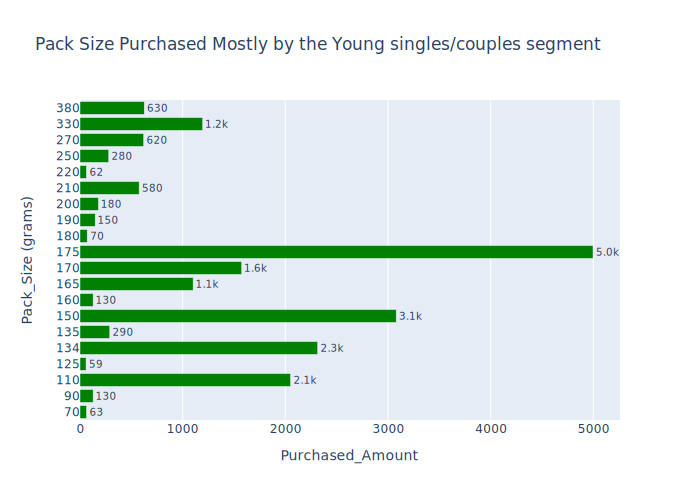

In [210]:
fig = px.bar(data_1, x='Purchased_Amount', y='Pack_Size (grams)', text='Purchased_Amount',orientation='h',
             title='Pack Size Purchased Mostly by the Young singles/couples segment')
fig.update_yaxes(type='category')
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside',marker_color='green')
fig.update_layout(uniformtext_minsize=13)

### What is the most purchased pack size by the OLDER FAMILIES from the Budget category ? 

In [211]:
#Filtering to get only customers from the YOUNG OLDER FAMILIE category from the life stage column
older_families = df3.loc[df3['Life_Stage'] == "OLDER FAMILIES"]

#Filtering the older families to get only customers from the Budget category from the customer category
older_families = older_families.loc[older_families['Customer_Category'] == "Budget"]

In [212]:
data_2 = older_families.groupby('Pack_Size (grams)')['Product_Quantity'].count().reset_index(name='Purchased_Amount')

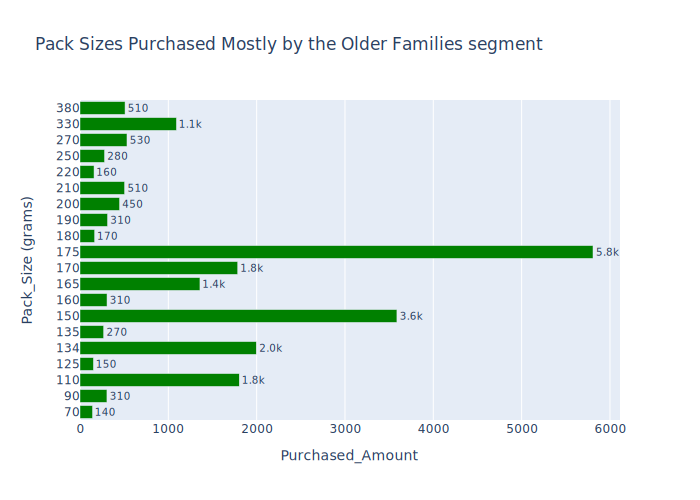

In [213]:
fig = px.bar(data_2, x='Purchased_Amount', y='Pack_Size (grams)', text='Purchased_Amount',orientation='h',
             title='Pack Sizes Purchased Mostly by the Older Families segment')
fig.update_yaxes(type='category')
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside',marker_color='green')
fig.update_layout(uniformtext_minsize=13)

From the graphs, both young singles/couples and older families of the mainstream and Budget customer category purchases the similar packet sizes of 175g,150g and 134g at higher rates compare to the 70g.

###  What are the  packets sizes mostly purchased from the various brands by the Young singles/couples and Older families segments ?

In [214]:
data_3 = young_singles_and_couples.groupby(['Brand_Names','Pack_Size (grams)'])['Total_Sales'].count().reset_index(name='Purchased_Amount')

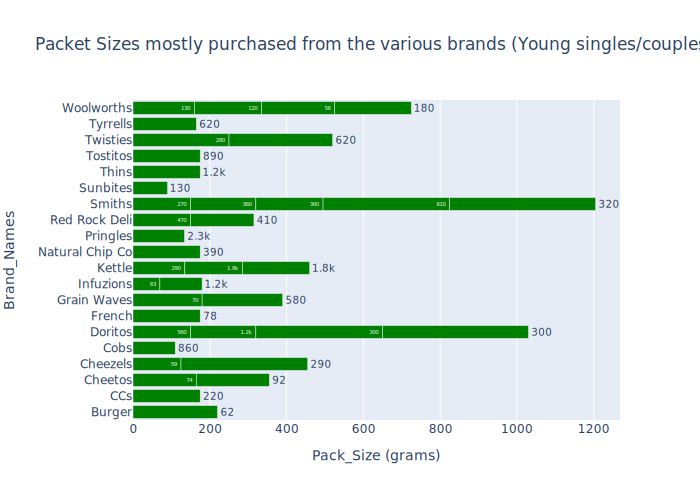

In [215]:
fig = px.bar(data_3, y='Brand_Names', x='Pack_Size (grams)', text='Purchased_Amount',orientation='h',
             title='Packet Sizes mostly purchased from the various brands (Young singles/couples)')
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside',marker_color='green')
fig.update_layout(uniformtext_minsize=13)

In [216]:
data_4 = older_families.groupby(['Brand_Names','Pack_Size (grams)'])['Total_Sales'].count().reset_index(name='Purchased_Amount')

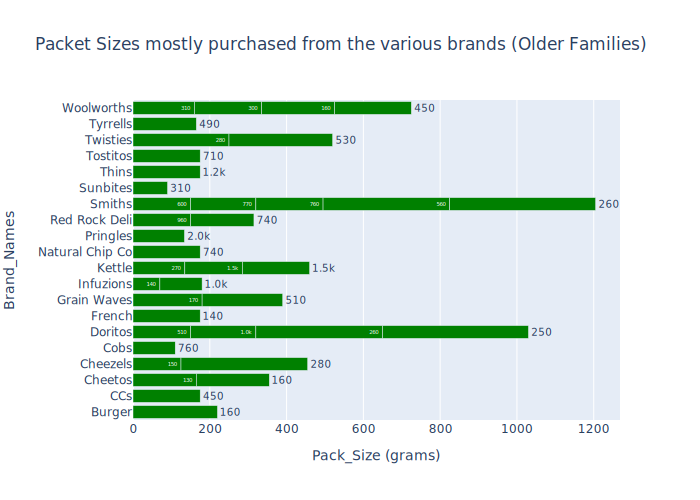

In [217]:
fig = px.bar(data_4, y='Brand_Names', x='Pack_Size (grams)', text='Purchased_Amount',orientation='h',
             title='Packet Sizes mostly purchased from the various brands (Older Families)')
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside',marker_color='green')
fig.update_layout(uniformtext_minsize=13)

- Brands Packet sizes mostly purchased by the younger singles/couples at high rates are Thins-175g,Pringles-134g,Kettle-150g and 175g,Infuzions-110g and Doritos-170g.
- Brands Packet sizes mostly purchased by the older families at high rates are Thins-175g,Pringles-134g,Kettle-150g and 175g,Infuzions-110g and Doritos-330g.

### Find out if the target segments of older families tends to buy larger packs of chips ?

In [218]:
#Introducing dummy values into the columns to generate the frequency of occurence of the values in the rows
category_group = pd.get_dummies(df4["Category_Grouping"])
pack_size = pd.get_dummies(df4["Pack_Size (grams)"])
df6 = category_group.join(pack_size)
df6.head(5)

,MIDAGE SINGLES/COUPLES - Budget,MIDAGE SINGLES/COUPLES - Mainstream,MIDAGE SINGLES/COUPLES - Premium,NEW FAMILIES - Budget,NEW FAMILIES - Mainstream,NEW FAMILIES - Premium,OLDER FAMILIES - Budget,OLDER FAMILIES - Mainstream,OLDER FAMILIES - Premium,OLDER SINGLES/COUPLES - Budget,...,175,180,190,200,210,220,250,270,330,380
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
#Introducing the association rule mining
df6_frequency = apriori(df6, min_support=0.008, use_colnames=True)
result = association_rules(df6_frequency, metric="lift", min_threshold=0.5)
result.sort_values('confidence', ascending = False, inplace = True)

In [220]:
#Getting only the unique grouping
unique_grouping = df4["Category_Grouping"].unique()
result[result["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in unique_grouping)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
48,(YOUNG FAMILIES - Premium),(175),0.04,0.27,0.01,0.28,1.03,0.00,1.01,0.03
42,(YOUNG FAMILIES - Budget),(175),0.07,0.27,0.02,0.28,1.03,0.00,1.01,0.03
2,(MIDAGE SINGLES/COUPLES - Premium),(175),0.03,0.27,0.01,0.27,1.02,0.00,1.01,0.02
50,(YOUNG SINGLES/COUPLES - Budget),(175),0.03,0.27,0.01,0.27,1.01,0.00,1.01,0.01
12,(OLDER FAMILIES - Mainstream),(175),0.05,0.27,0.01,0.27,1.01,0.00,1.00,0.01
14,(OLDER FAMILIES - Premium),(175),0.04,0.27,0.01,0.27,1.01,0.00,1.00,0.01
30,(RETIREES - Budget),(175),0.06,0.27,0.02,0.27,1.01,0.00,1.00,0.01
38,(RETIREES - Premium),(175),0.05,0.27,0.01,0.27,1.00,0.00,1.00,0.00
8,(OLDER FAMILIES - Budget),(175),0.09,0.27,0.02,0.27,1.00,0.00,1.00,0.00
18,(OLDER SINGLES/COUPLES - Budget),(175),0.07,0.27,0.02,0.27,1.00,0.00,1.00,0.00


In [221]:
result[['antecedents','consequents','antecedent support','consequent support','support','confidence',
        'lift','leverage','conviction']]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
48,(YOUNG FAMILIES - Premium),(175),0.04,0.27,0.01,0.28,1.03,0.00,1.01
42,(YOUNG FAMILIES - Budget),(175),0.07,0.27,0.02,0.28,1.03,0.00,1.01
2,(MIDAGE SINGLES/COUPLES - Premium),(175),0.03,0.27,0.01,0.27,1.02,0.00,1.01
50,(YOUNG SINGLES/COUPLES - Budget),(175),0.03,0.27,0.01,0.27,1.01,0.00,1.01
12,(OLDER FAMILIES - Mainstream),(175),0.05,0.27,0.01,0.27,1.01,0.00,1.00
14,(OLDER FAMILIES - Premium),(175),0.04,0.27,0.01,0.27,1.01,0.00,1.00
30,(RETIREES - Budget),(175),0.06,0.27,0.02,0.27,1.01,0.00,1.00
38,(RETIREES - Premium),(175),0.05,0.27,0.01,0.27,1.00,0.00,1.00
8,(OLDER FAMILIES - Budget),(175),0.09,0.27,0.02,0.27,1.00,0.00,1.00
18,(OLDER SINGLES/COUPLES - Budget),(175),0.07,0.27,0.02,0.27,1.00,0.00,1.00


In [222]:
#Getting the target segment
target = older_families["Pack_Size (grams)"].value_counts().sort_values(ascending = True).rename_axis('Packet_Sizes').reset_index(name='Target')
target["Target"] = target["Target"] / older_families["Product_Quantity"].sum()

#Getting the non-target segment
non_target = non_target_segment["Pack_Size (grams)"].value_counts().sort_values(ascending = True).rename_axis('Packet_Sizes').reset_index(name='Non_Target')
non_target["Non_Target"] = non_target["Non_Target"] / non_target_segment["Product_Quantity"].sum()

#Combining the target and non target to get the affinity values 
packet = target.set_index('Packet_Sizes').join(non_target.set_index('Packet_Sizes'))
packet = packet.reset_index()
packet['Affinity_Value'] = packet['Target'] / packet['Non_Target']
packet.sort_values('Affinity_Value', ascending = False)

,Packet_Sizes,Target,Non_Target,Affinity_Value
3,180,0.00,0.00,1.36
7,160,0.01,0.01,1.25
2,220,0.00,0.00,1.24
8,190,0.01,0.01,1.24
1,125,0.00,0.00,1.22
9,200,0.01,0.01,1.22
6,90,0.01,0.01,1.22
0,70,0.00,0.00,1.12
14,165,0.03,0.03,1.02
15,170,0.04,0.04,1.00


The affinity value indicates that budget older families are more likely to purchase 180g packet of chips than any other packet sizes

### INSIGHTS SUMMARY
1. The top five(5) segments that contributes to highest sales are,<br>
 - Older Families from the Budget customer category segment.
 - Young singles/couples from the Mainstream customer category segment.
 - Retirees also from the mainstream segment.
 - Young Families from the budget segment.
 - Older Singles/Couples from the budget segment.
 
2. Majority of customers are from the Young singles/couples and Retirees all from the Mainstream customer category,hence high sales are due to their large customers.
3. Customers from the Mainstream customer category tends to buy more chips, closely followed by the Budget segment. The Premium segments buys less chips.
4. Both young singles/couples and older families of the mainstream and Budget customer category purchases the similar chips packet sizes of 175g,150g and 134g at higher rates compare to the 70g.
5. Brands of target by customers from the Older families and Young singles/couples, which are also the highest purchasers of chips are;
 - Kettle.
 - Smiths.
 - Doritos.
 - Pringles.
6. Most likely brands of chips to be purchase by the Older families base on the affinity index is Red Rock Deli chips, while for Young singles/couples is Tyrrels chips.

### Recommendations

1. If targeted customers are the older families and young singles/couples then kettle,smiths,doritos and pringles chips of sizes and their appropritae packet sizes gotten from the analysis should be placed besides Red Rock Deli chips and Tyrrels chips base on their association rule.
2. The Buger brand of packet size 220g was purchased in low quantity,hence the packet size should be readjusted to a more desirable size.
3. Market survey and Rebranding should be carried out for brands with low sales mostly with segments with high customers.
4. Customers located at the mainstream and budget segments should be of priority to the business.
5. Provide more promotional contents of rebranded chips to customers at the premium segments.